# RNN(Recurrent Neural Network, 순환 신경망)

시계열 데이터, 자연어 처리

Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import tensorflow as tf
import keras

from sklearn.model_selection import train_test_split

# IMDB 데이터셋

*   imdb 사이트 사용자들의 영화 리뷰를 긍정(1), 부정(0)으로 분류한 데이터.
*   25,000개 훈련 샘플과 25,000개 테스트 샘플.
*   샘플마다 토큰(단어)의 개수가 다름.

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = \
        keras.datasets.imdb.load_data(num_words = 200)

# num_words: 가장 자주 등장하는 단어 n개를 어휘 사전으로 사용함.


In [ ]:
x_train_full.shape

(25000,)

In [ ]:
x_test.shape

(25000,)

In [ ]:
y_train_full.shape

(25000,)

In [ ]:
y_test.shape

(25000,)

In [ ]:
np.unique(y_train_full, return_counts = True)
#> 훈련 셋에는 긍정/부정 리뷰가 각각 12500개씩 포함.

(array([0, 1]), array([12500, 12500]))

In [ ]:
np.unique(y_test, return_counts = True)
#> 테스트 셋에서도 긍정/부정 리뷰가 각각 12500개씩 포함.

(array([0, 1]), array([12500, 12500]))

## 훈련 셋 탐색

In [ ]:
print(x_train_full[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
print(type(x_train_full[0]))

<class 'list'>


In [ ]:
print(len(x_train_full[0]))

218


훈련 셋의 첫번째 샘플은 정수 218개를 갖는 리스트(list).

In [ ]:
print(x_train_full[1])

[1, 194, 2, 194, 2, 78, 2, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 2, 20, 13, 119, 2, 189, 102, 5, 2, 110, 2, 21, 14, 69, 188, 8, 30, 23, 7, 4, 2, 126, 93, 4, 114, 9, 2, 2, 5, 2, 4, 116, 9, 35, 2, 4, 2, 9, 2, 2, 4, 118, 9, 4, 130, 2, 19, 4, 2, 5, 89, 29, 2, 46, 37, 4, 2, 9, 45, 43, 38, 2, 2, 2, 4, 2, 26, 2, 5, 163, 11, 2, 2, 4, 2, 9, 194, 2, 7, 2, 2, 2, 2, 148, 2, 2, 2, 15, 123, 125, 68, 2, 2, 15, 2, 165, 2, 98, 5, 4, 2, 9, 43, 2, 2, 15, 2, 120, 5, 120, 174, 11, 2, 175, 136, 50, 9, 2, 2, 2, 5, 2, 2, 2, 2, 5, 4, 2, 131, 152, 2, 18, 2, 32, 2, 2, 14, 9, 6, 2, 78, 22, 2, 64, 2, 9, 8, 168, 145, 23, 4, 2, 15, 16, 4, 2, 5, 28, 6, 52, 154, 2, 33, 89, 78, 2, 16, 145, 95]


In [ ]:
print(type(x_train_full[1]))

<class 'list'>


In [ ]:
print(len(x_train_full[1]))

189


훈련 셋의 두번째 샘플은 정수 189개를 갖는 리스트(list).

imdb 데이터 셋의 훈련 셋은 파이썬의 *리스트(list) 객체*를 원소로 갖는 **1차원 np.ndarray** 타입.

In [ ]:
# 훈련 셋에서 첫 5개 샘플에서 나오는 첫 20개의 인코딩 숫자들
for i in range(5):
    print(f'인덱스 - {i} 샘플의 토큰(단어) 개수: {len(x_train_full[i])}')

인덱스 - 0 샘플의 토큰(단어) 개수: 218
인덱스 - 1 샘플의 토큰(단어) 개수: 189
인덱스 - 2 샘플의 토큰(단어) 개수: 141
인덱스 - 3 샘플의 토큰(단어) 개수: 550
인덱스 - 4 샘플의 토큰(단어) 개수: 147


각각의 영화 리뷰의 길이(사용된 단어 개수)가 다르다. 1차원 리스트의 원소들은 영어 단어에 매칭된 숫자들.

In [ ]:
# word_index: 단어(word)를 키로 갖고, 그 단어의 인덱스를 값으로 갖는 dict.
# 영화 리뷰의 단어들을 숫자로 인코딩할 때 사용하기 위해서 만들어진 dict.
# 숫자 인덱스는 데이터셋에 등장하는 빈도수에 따라서 결정.
word_index = keras.datasets.imdb.get_word_index()

In [ ]:
print(type(word_index))
#> 단어(word)를 키로 갖고, 그 단어의 인덱스를 값으로 갖는 dict.

<class 'dict'>


In [ ]:
len(word_index)

88584

In [ ]:
for i, (k , v) in enumerate(word_index.items()):
    print(k, v)
    if i == 5:
        break

fawn 34701
tsukino 52006
nunnery 52007
sonja 16816
vani 63951
woods 1408


인덱스를 단어로 디코딩하기 위해서는 단어의 인덱스를 키로 하고 단어를 값으로 갖는 dict가 있었으면.....

In [ ]:
index_word = {v: k for k, v in word_index.items()}

In [ ]:
for i, (k, v) in enumerate(index_word.items()):
    print(k,v)
    if i == 5:
        break

34701 fawn
52006 tsukino
52007 nunnery
16816 sonja
63951 vani
1408 woods


In [ ]:
for i in range(1, 6):
    print(index_word.get(i))            # index_word[i]

the
and
a
of
to


각 단어의 인덱스들은 단어의 빈도수 순위를 의미. 인덱스 0은 패딩(padding)을 위한 숫자.

영화 리뷰 샘플의 숫자들의 의미:
*   0: 패딩(padding)
*   1: 문장의 시작.
*   2: load_data() 함수의 아규먼트 num_words에 포함되지 않은 단어들.
*   3: word_index (또는 index_word)의 인덱스.

In [ ]:
def decode_review(review):
    # review: 숫자들의 리스트
    return ''.join([index_word.get(i-3, '?') for i in review])

In [ ]:
decode_review(x_train_full[0])

"?thisfilmwasjust????story??really?thepartthey?andyoucouldjust?beingthere??isan??andnowthesamebeingdirector???fromthesame??as?soi?thefacttherewasareal?withthisfilmthe???thefilmweregreatitwasjust?somuchthati?thefilmas?asitwas?for?andwould?itto?towatchandthe??was?really?attheenditwasso?andyouknowwhattheysayifyou?atafilmit?havebeengoodandthis?wasalso?tothetwolittle?that?the?of?and?theywerejust??are??outofthe??ithinkbecausethe?that?themall?uparesuchabig?forthe?filmbutthese?are?andshouldbe?forwhattheyhave?don'tyouthinkthe?storywasso?becauseitwas?andwas?lifeafterallthatwas?withusall"

In [ ]:
decode_review(x_train_full[1])

"?big?big?bad?anda???thesearethe?tobest?this?movieilove?horrormoviesand?seen?butthishadgottobeonofthe?evermadetheplotis??and?theactingisan?the?is??thebestistheend?withthe?andhowhe?outwhothe?isit'sjustso???the?are?andfunnyin??the?isbig?of????those???thatshowofftheir??that?actually?themandthe?isjust??that?overandoveragainin?everyscenethereis???and????andthe?stilldoesn't?for?all??thisisa?badfilm?only?istolookbackonthe?thatwasthe?andhaveagoodold?athowbad?wasbackthen"

### 각 샘플의 길이 분포

각각의 영화 리뷰의 길이(포함된 단어 개수) 분포

In [ ]:
review_lengths = pd.Series([len(x) for x in x_train_full])

In [ ]:
review_lengths.describe()           # 기술 통계량

,0
count,25000.000000
mean,238.713640
std,176.497204
min,11.000000
25%,130.000000
50%,178.000000
75%,291.000000
max,2494.000000


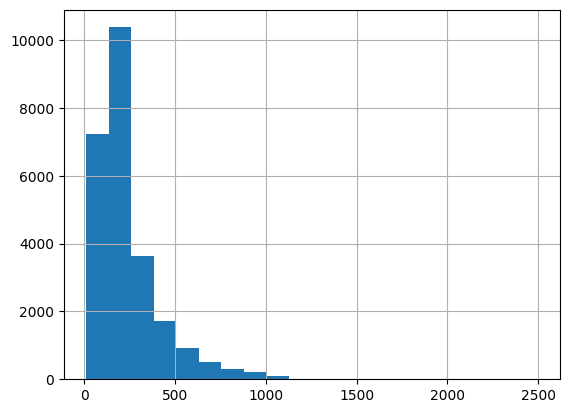

In [ ]:
review_lengths.hist(bins= 20)           # 히스토그램
plt.show()

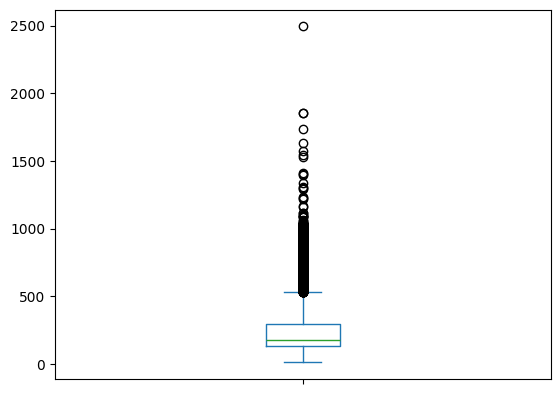

In [ ]:
review_lengths.plot.box()
plt.show()

대부분의 리뷰에 사용된 단어의 개수는 300개 미만. 평균(238개)이 중앙값(178개)보다 많이 큰 이유는 사용된 단어의 개수가 매우 많은 리뷰들이 간혹 있기 때문에.

신경망을 훈련시키기 위해서는 모든 샘플들의 길이가 같아야함.

샘플(영화 리뷰)마다 100개의 단어(토큰)만 사용. 길이가 100이상인 샘플들은 잘라내고, 길이가 100미만인 샘플들은 패딩을 추가.

## Data wrangling

(25_000, ) shape의 훈련/테스트 셋을 (25_000, 100) shape으로 변환.

`keras.preprocessing.sequence.pad_sequence()` 함수의 파라미터:
*   sequences: 변환할 데이터
*   maxlen: 각 샘플의 최대 길이.
*   padding: 샘플의 길이가 maxlen보다 짧을 때 패딩을 넣을 위치. 기본값은 'pre'. 기본값은 패딩(0)을 시퀀스의 앞쪽에 채움.
*   truncating: 샘플의 길이가 maxlen보다 길 때 샘플을 자르는 위치. 기본값은 'pre', 기본값은 시퀀스의 앞쪽을 자름.
*   순환신경망을 사용할 때 padding과 truncating은 모두 'pre' 방식을 선호.

In [ ]:
x_train_full_seq = keras.preprocessing.sequence.pad_sequences(sequences = x_train_full,
                                                              maxlen= 100)

In [ ]:
x_train_full_seq.shape          #> (n_samples, n_tokens)

(25000, 100)

In [ ]:
x_test_seq= keras.preprocessing.sequence.pad_sequences(sequences = x_test,
                                                       maxlen= 100)

In [ ]:
x_test_seq.shape                #> (n_samples, n_timesteps)
# pad sequence() 함수는 파이썬 리스트를 numpy.ndarray 타입으로 변환.

(25000, 100)

In [ ]:
print(x_train_full_seq[0])

[  2  33   6  22  12   2  28  77  52   5  14   2  16  82   2   8   4 107
 117   2  15   2   4   2   7   2   5   2  36  71  43   2   2  26   2   2
  46   7   4   2   2  13 104  88   4   2  15   2  98  32   2  56  26 141
   6 194   2  18   4   2  22  21 134   2  26   2   5 144  30   2  18  51
  36  28   2  92  25 104   4   2  65  16  38   2  88  12  16   2   5  16
   2 113 103  32  15  16   2  19 178  32]


In [ ]:
print(x_train_full[0][-100:])            # 첫번째 샘플의 마지막 100개 토큰.
#> truncating= 'pre': 원본 샘플의 앞쪽을 잘라서 버림.


[2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
for i in range(25_000):
    if x_train_full_seq[i,0] == 0:
        print(f'i = {i}')
        print(x_train_full_seq[i])
        break

i = 5
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   1   2 128  74  12   2 163  15   4   2   2   2   2  32  85
 156  45  40 148 139 121   2   2  10  10   2 173   4   2   2  16   2   8
   4   2  65  12  43 127  24   2  10  10]


In [ ]:
print(x_train_full[5])
#> padding= 'pre': 시퀀스의 길이를 100으로 만들기 위해서 원본 샘플의 앞쪽에 0을 채움.

[1, 2, 128, 74, 12, 2, 163, 15, 4, 2, 2, 2, 2, 32, 85, 156, 45, 40, 148, 139, 121, 2, 2, 10, 10, 2, 173, 4, 2, 2, 16, 2, 8, 4, 2, 65, 12, 43, 127, 24, 2, 10, 10]


# RNN

*   FFNN(Feed-Forward Neural Network): 데이터의 흐름이 앞으로만 전달되는 신경망
    *   완전 연결 신경망
    *   합성곱 신경망(CNN, Convolutional Neural Network)
*   RNN(Recurrent Neural Network): 순환 신경망
    *   순차 데이터(sequencial data): 순환 신경망에서 사용하는 데이터. 텍스트(문장) 또는 시계열 데이터와 같이 순서가 의미가 있는 데이터.
    *   timestep: 샘플을 처리하는 한 단계. 시퀀스의 각 원소.
    *   cell(셀): 순환 신경망 층(recurrent layer)
    *   hidden state(은닉 상태): 셀의 출력(output)
    *   sequence(시퀀스): 순환 신경망에서 사용하는 하나의 샘플.
    *   자연어 처리(NLP, Natural Language Processing)와 같은 경우에 특정 단어가 다른 단어보다 더 중요할 이유는 없음. 단어가 정수로 인코딩된 값의 대소가 중요하지 않음. 인코딩된 정수가 신경망으로 주입되면 안됨.
        *   정수를 one-hot encoding으로 변환.
            *   계산량이 많아지고, 메모리를 많이 사용함.
        *   정수를 word-embedding으로 변환.
            *    one-hot encoding의 단점을 보완.
            *   정수 1개를 몇 개의 실수들로 인코딩하는 방법


## One-Hot Encoding을 사용한 RNN

*   One-Hot Encoding 하기 전에, 시퀀스들로 변환한 전체 훈련 셋을 훈련 셋과 검증 셋으로 나눔.
*   순환 신경망의 첫번째 층을 CategoryEncoding 층으로 설정.
*   simpleRNN 층을 추가. 출력층을 추가.
*   모델 훈련.

In [ ]:
x_train_seq, x_val_seq, y_train, y_val = \
            train_test_split(x_train_full_seq, y_train_full,
                             test_size= 0.2,
                             random_state= 42,
                             stratify = y_train_full)

In [ ]:
model = keras.Sequential(layers= [
    keras.Input(shape= (100,)),                                             # 입력층
    keras.layers.CategoryEncoding(num_tokens= 200, output_mode= 'one_hot'),      # One-Hot 인코딩
    keras.layers.SimpleRNN(units= 8),                                       # 순환층
    keras.layers.Dense(units= 1, activation= 'sigmoid')                     # 출력층
])

In [ ]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ category_encoding_1             │ (None, 100, 200)       │             0 │
│ (CategoryEncoding)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(200 + 8 + 1) * 8

1672

In [ ]:
model.compile(optimizer= keras.optimizers.Adam(),
              loss= keras.losses.binary_crossentropy,
              metrics = [keras.metrics.binary_accuracy])

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath= 'rnn_1hot.keras',
                                             save_best_only= True)
early_stop= keras.callbacks.EarlyStopping(patience= 3, restore_best_weights= True)


In [ ]:
result = model.fit(x= x_train_seq, y= y_train, batch_size= 64, epochs= 100,
                   callbacks= [checkpoint, early_stop],
                   validation_data= [x_val_seq, y_val])                         # 훈련셋 전체의 정확도가 아니라 하나하나 epoch의 batch의 정확도를 계산한 값이다.

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - binary_accuracy: 0.5102 - loss: 0.7037 - val_binary_accuracy: 0.6112 - val_loss: 0.6612
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - binary_accuracy: 0.6234 - loss: 0.6528 - val_binary_accuracy: 0.6814 - val_loss: 0.6024
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - binary_accuracy: 0.6904 - loss: 0.5907 - val_binary_accuracy: 0.7082 - val_loss: 0.5744
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - binary_accuracy: 0.7121 - loss: 0.5686 - val_binary_accuracy: 0.7140 - val_loss: 0.5717
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - binary_accuracy: 0.7197 - loss: 0.5611 - val_binary_accuracy: 0.7150 - val_loss: 0.5619
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - binary_accuracy: 0.7231 - loss: 0.5548 - val_binary_accuracy: 0.7154 - val_loss: 0.5617
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - binary_accuracy: 0.7226 - loss: 0.5538 - val_binary_accuracy: 0.7154 - val_lo

In [ ]:
# 훈련셋의 손실/ 정확도
model.evaluate(x= x_train_seq, y= y_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - binary_accuracy: 0.7364 - loss: 0.5369


[0.5364956855773926, 0.7372999787330627]

In [ ]:
# 검증 셋의 손실/ 정확도
model.evaluate(x= x_val_seq, y= y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.7152 - loss: 0.5633


[0.5616661906242371, 0.715399980545044]

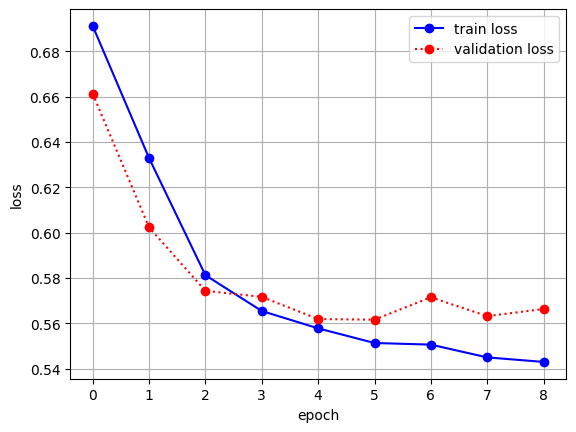

In [ ]:
epoch = result.epoch
history = result.history
plt.plot(epoch, history['loss'], 'bo-', label= 'train loss')
plt.plot(epoch, history['val_loss'], 'ro:', label= 'validation loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.show()

In [ ]:
# x_train_full_1h =  keras.utils.to_categorical(x= x_train_full_seq)

In [ ]:
# x_train_full_1h.shape       # (n_samples, n_timesteps, n_class)

In [ ]:
# x_test_1h = keras.utils.to_categorical(x= x_test_seq)

In [ ]:
# x_test_1h.shape

In [ ]:
# x_train_full_1h[0, 0]           # 첫번째 샘플(리뷰)의 첫번째 타임스텝(단어)의 1-hot encoding.

In [ ]:
# 전체 훈련 셋을 훈련/검증 셋으로 분리
# x_train, x_val, y_train, y_val = train_test_split(x_train_full_1h, y_train_full,
#                                                   test_size = 0.2,
#                                                   random_state= 42,
#                                                   stratify = y_train_full)

## Word Embedding을 사용한 RNN

keras,layers.Embedding 객체를 사용.

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full_seq, y_train_full,
                                                  test_size = 0.2,
                                                  random_state= 42,
                                                  stratify= y_train_full)

In [ ]:
x_train.shape           #> (n_samples, n_timesteps)

(20000, 100)

In [ ]:
x_val.shape             #> (n_samples, n_timesteps)

(5000, 100)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

rnn_1 = keras.Sequential(layers= [
    keras.Input(shape=(100,)),                                      # 입력층
    keras.layers.Embedding(input_dim= 200, output_dim= 16),         # 단어 임베딩 계층
    keras.layers.SimpleRNN(units= 8),                               # 순환계층
    keras.layers.Dense(units= 1, activation= 'sigmoid')             # 출력층
])

In [ ]:
rnn_1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 100, 16)        │         3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Embedding 계층의 모델 파라미터 개수 = 단어 사전 어휘 개수 X 임베딩 출력
200 * 16

3200

In [ ]:
# SimpleRUN의 모델 파라미터 개수 = (각 타임스텝의 입력값 개수 + 순환 셀 개수 + 바이어스) * 순환셀 개수
(16 + 8 + 1) * 8

200

In [ ]:
# 출력층에 모델 파라미터 개수
8 + 1

9

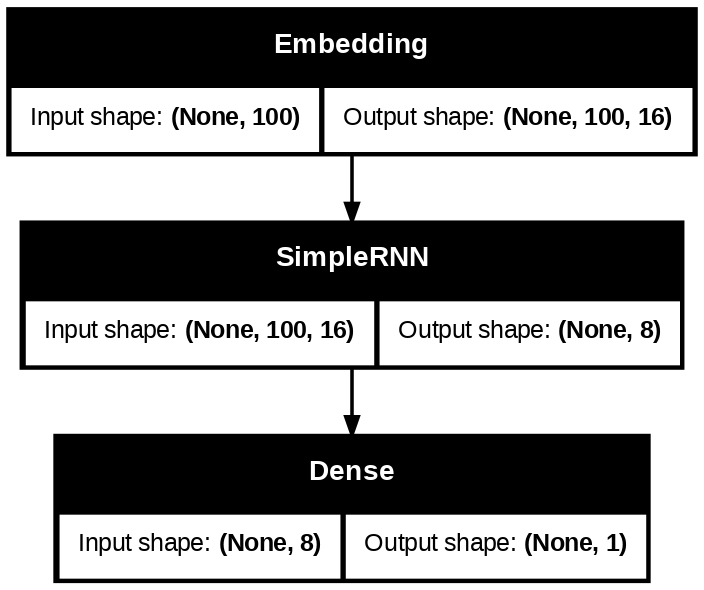

In [ ]:
keras.utils.plot_model(rnn_1, show_shapes= True, dpi= 128)

In [ ]:
# 모델 컴파일
rnn_1.compile(optimizer= keras.optimizers.Adam(),
              loss = keras.losses.binary_crossentropy,
              metrics = [keras.metrics.binary_accuracy])

In [ ]:
# 체크포인트, 조기종료 콜백
checkpoint = keras.callbacks.ModelCheckpoint(filepath= 'rnn_1.keras',
                                             save_best_only= True)
early_stop = keras.callbacks.EarlyStopping(patience= 3, restore_best_weights= True)

In [ ]:
# 모델 훈련
result = rnn_1.fit(x= x_train, y= y_train, batch_size= 64,
                   callbacks= [checkpoint, early_stop],
                   validation_data= [x_val, y_val], epochs= 100)

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - binary_accuracy: 0.5068 - loss: 0.6934 - val_binary_accuracy: 0.5248 - val_loss: 0.6899
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - binary_accuracy: 0.5655 - loss: 0.6818 - val_binary_accuracy: 0.5348 - val_loss: 0.6882
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - binary_accuracy: 0.5753 - loss: 0.6730 - val_binary_accuracy: 0.5458 - val_loss: 0.7410
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - binary_accuracy: 0.5560 - loss: 0.6947 - val_binary_accuracy: 0.5612 - val_loss: 0.6791
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - binary_accuracy: 0.5904 - loss: 0.6680 - val_binary_accuracy: 0.5918 - val_loss: 0.6640
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - binary_accuracy: 0.6217 - loss: 0.6496 - val_binary_accuracy: 0.6154 - val_loss: 0.6568
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - binary_accuracy: 0.6368 - loss: 0.6370 - val_binary_accuracy: 0.5622 - val_loss: 0

In [ ]:
def plot_train_val_loss(history):
    epoch = history.epoch
    history = history.history
    plt.plot(epoch, history['loss'], 'bo-', label='train loss')
    plt.plot(epoch, history['val_loss'], 'ro:', label='validation loss')
    plt.legend()
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

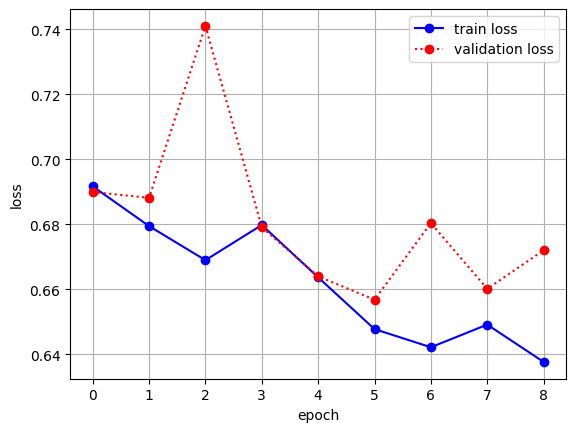

In [ ]:
plot_train_val_loss(result)

In [ ]:

# 훈련 셋 예측값
train_predicts = rnn_1.predict(x=x_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
train_predicts[:10]

array([[0.4368486 ],
       [0.4296087 ],
       [0.62026006],
       [0.34937966],
       [0.6422143 ],
       [0.49857557],
       [0.38199815],
       [0.6677201 ],
       [0.5249812 ],
       [0.5225428 ]], dtype=float32)

In [ ]:
train_pred_labels = (train_predicts > 0.5).astype('int').ravel()

In [ ]:
train_pred_labels[:10]

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [ ]:
y_train[:10]

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
np.mean(train_pred_labels == y_train)

np.float64(0.6451)

In [ ]:
val_predicts = rnn_1.predict(x=x_val)  # 검증 셋 예측값
val_pred_labels = (val_predicts > 0.5).astype('int').ravel()  # 예측 레이블(타겟)
np.mean(y_val == val_pred_labels)  # 검증 셋 정확도


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


np.float64(0.6154)

# 연습

*   imdb 데이터셋을 다시 로딩하세요. 자주 사용되는 단어 500개를 사용하세요.
    *   x_train_full의 shape = (25_000,)
*   훈련 셋의 모든 샘플을 100개의 timestep을 갖는 시퀀스로 변환하세요.
    *   x_train_full_seq의 shape = (25_000, 100)
*   단어 임베딩을 사용한 가장 간단한 RNN을 생성하세요.
    *   Embedding -> SimpleRNN -> Dense
    *   단어 임베딩의 출력은 32로 설정.
    *   순환 망의 셀 개수는 32로 설정.
    *   순환 망의 dropout 비율을 0.3으로 설정.
*   모델을 훈련하고 평가하세요.

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.imdb.load_data(num_words= 500)

In [ ]:
x_train_full.shape

(25000,)

In [ ]:
x_train_full_seq = keras.preprocessing.sequence.pad_sequences(sequences= x_train_full, maxlen= 100)

In [ ]:
x_train_full_seq.shape

(25000, 100)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full_seq, y_train_full,
                                                  test_size= 0.2,
                                                  random_state=42,
                                                  stratify= y_train_full)

In [ ]:
x_train.shape

(20000, 100)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

rnn_2 = keras.Sequential(layers= [
    keras.Input(shape=(100,)),
    keras.layers.Embedding(input_dim= 500, output_dim= 32),
    keras.layers.SimpleRNN(units= 32, dropout= 0.3),
    keras.layers.Dense(units=1, activation= 'sigmoid')
])

In [ ]:
rnn_2.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 32)        │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,113 (70.75 KB)

 Trainable params: 18,113 (70.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rnn_2.compile(optimizer= keras.optimizers.Adam(),
              loss= keras.losses.binary_crossentropy,
              metrics= [keras.metrics.binary_accuracy])

In [ ]:
checkpoint= keras.callbacks.ModelCheckpoint(filepath='rnn_2.keras', save_best_only= True)
early_stop = keras.callbacks.EarlyStopping(patience= 3, restore_best_weights= True)

In [ ]:
result2 = rnn_2.fit(x= x_train, y= y_train, batch_size= 32, epochs= 100,
                 callbacks= [checkpoint, early_stop],
                 validation_data = [x_val, y_val])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - binary_accuracy: 0.5345 - loss: 0.6897 - val_binary_accuracy: 0.5718 - val_loss: 0.6903
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - binary_accuracy: 0.6797 - loss: 0.5968 - val_binary_accuracy: 0.7424 - val_loss: 0.5246
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.7658 - loss: 0.4948 - val_binary_accuracy: 0.7594 - val_loss: 0.5426
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - binary_accuracy: 0.7694 - loss: 0.4858 - val_binary_accuracy: 0.7666 - val_loss: 0.4905
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - binary_accuracy: 0.7776 - loss: 0.4750 - val_binary_accuracy: 0.7474 - val_loss: 0.5646
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - binary_accuracy: 0.7804 - loss: 0.4707 - val_binary_accuracy: 0.7612 - val_loss: 0.5305
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - binary_accuracy: 0.7926 - loss: 0.4592 - val_binary_accuracy: 0.7518 - val_l

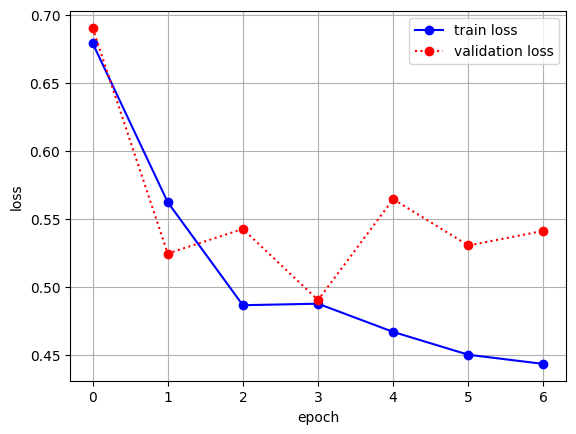

In [ ]:
plot_train_val_loss(result2)

# LSTM(Long Short-Term Memory, 장/단기 기억)

*   단기 기억을 오래 기억하기 위해서 고안된 순환 신경망.
*   LSTM 셀 한 개는 입력 게이트, 삭제 게이트, 출력 게이트를 가지고 있음.
    *   입력 게이트: 새로운 정보를 셀 상태(cell state)에 추가. 단기 기억 저장.
    *   삭제 게이트: 셀 상태에 있는 정보를 제거. 장기 기억을 삭제.
    *   출력 게이트: 다음 은닉 상태(hidden state)로 출력을 내보냄.
    *   LSTM 셀 한 개는 작은 순환 신경 셀 4개로 이루어진 구조.

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model_lstm = keras.Sequential(layers= [
    keras.Input(shape= (100,)),
    keras.layers.Embedding(input_dim = 500, output_dim= 32),
    keras.layers.LSTM(units= 32),
    keras.layers.Dense(units=1, activation= 'sigmoid')
])

model_lstm.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 100, 32)        │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,353 (95.13 KB)

 Trainable params: 24,353 (95.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# LSTM 층의 모델 파라미터 개수 = (embedding input + 순환입력 + bias) * 게이트(4) * 셀
(32 + 32 + 1) * 4 * 32

8320

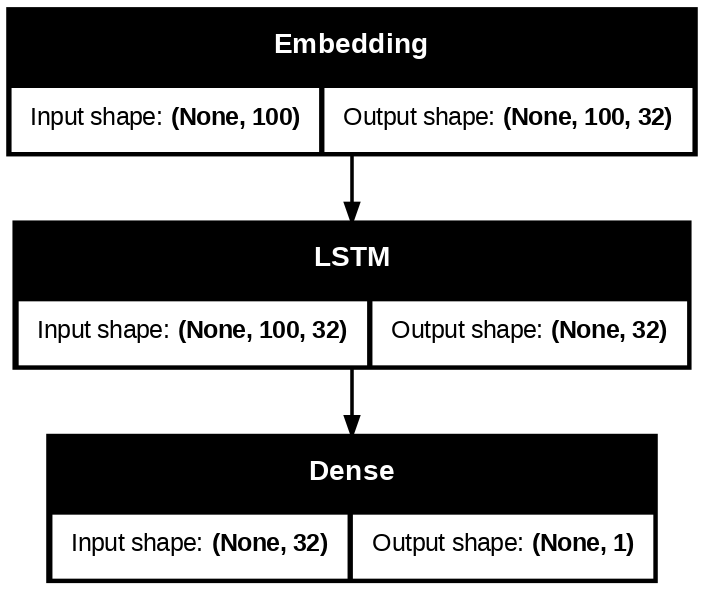

In [ ]:
keras.utils.plot_model(model = model_lstm, show_shapes= True, dpi= 128)

In [ ]:
model_lstm.compile(optimizer= keras.optimizers.Adam(),
              loss= keras.losses.binary_crossentropy,
              metrics= [keras.metrics.binary_accuracy])

In [ ]:
chekpoint = keras.callbacks.ModelCheckpoint(filepath= 'lstm.keras', save_best_only = True )
early_stop = keras.callbacks.EarlyStopping(patience= 3, restore_best_weights= True)

In [ ]:
result3 = model_lstm.fit(x= x_train, y= y_train, batch_size= 64, epochs= 100,
                     callbacks = [checkpoint, early_stop],
                     validation_data= [x_val, y_val])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - binary_accuracy: 0.6308 - loss: 0.6197 - val_binary_accuracy: 0.7284 - val_loss: 0.5486
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - binary_accuracy: 0.7791 - loss: 0.4722 - val_binary_accuracy: 0.7784 - val_loss: 0.4640
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - binary_accuracy: 0.7935 - loss: 0.4396 - val_binary_accuracy: 0.7790 - val_loss: 0.4550
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - binary_accuracy: 0.8009 - loss: 0.4229 - val_binary_accuracy: 0.7772 - val_loss: 0.4577
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - binary_accuracy: 0.8095 - loss: 0.4109 - val_binary_accuracy: 0.7800 - val_loss: 0.4577
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - binary_accuracy: 0.8143 - loss: 0.3986 - val_binary_accuracy: 0.7872 - val_loss: 0.4525
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - binary_accuracy: 0.8146 - loss: 0.3901 - val_binary_accuracy: 0.8020 - val_loss: 

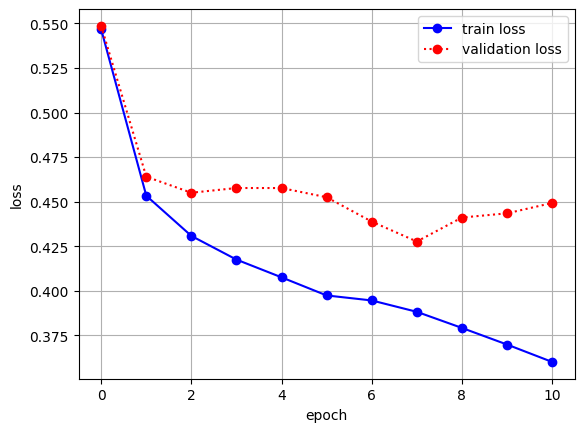

In [ ]:
plot_train_val_loss(result3)

In [ ]:
model_lstm.evaluate(x= x_train, y= y_train, batch_size = 64)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - binary_accuracy: 0.8354 - loss: 0.3634


[0.3569844365119934, 0.838100016117096]

In [ ]:
model_lstm.evaluate(x= x_val, y= y_val, batch_size =64)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - binary_accuracy: 0.8130 - loss: 0.4293


[0.42767027020454407, 0.8109999895095825]

## Drop-out을 적용한 LSTM

In [ ]:
model_lstm2 = keras.Sequential(layers = [
    keras.Input(shape=(100,)),
    keras.layers.Embedding(input_dim = 500, output_dim= 32),
    keras.layers.LSTM(units= 32, dropout= 0.2),
    keras.layers.Dense(units= 1, activation= 'sigmoid')
])

In [ ]:
model_lstm2.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 32)        │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,353 (95.13 KB)

 Trainable params: 24,353 (95.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_lstm2.compile(optimizer= keras.optimizers.Adam(),
                    loss= keras.losses.binary_crossentropy,
                    metrics = [keras.metrics.binary_accuracy])

In [ ]:
checkpoint= keras.callbacks.ModelCheckpoint(filepath= 'lstm_dropout.keras',
                                            save_best_only= True)
early_stop = keras.callbacks.EarlyStopping(patience= 3,
                                           restore_best_weights= True)

In [ ]:
result4 = model_lstm2.fit(x= x_train, y= y_train, batch_size= 32, epochs= 100,
                          callbacks = [checkpoint, early_stop],
                          validation_data = [x_val, y_val])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - binary_accuracy: 0.6321 - loss: 0.6198 - val_binary_accuracy: 0.7832 - val_loss: 0.4580
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - binary_accuracy: 0.7836 - loss: 0.4579 - val_binary_accuracy: 0.7896 - val_loss: 0.4412
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - binary_accuracy: 0.7982 - loss: 0.4326 - val_binary_accuracy: 0.7988 - val_loss: 0.4423
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - binary_accuracy: 0.8070 - loss: 0.4142 - val_binary_accuracy: 0.8034 - val_loss: 0.4366
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - binary_accuracy: 0.8159 - loss: 0.4001 - val_binary_accuracy: 0.8000 - val_loss: 0.4328
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - binary_accuracy: 0.8148 - loss: 0.3960 - val_binary_accuracy: 0.8008 - val_loss: 0.4298
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - binary_accuracy: 0.8193 - loss: 0.3861 - val_binary_accuracy: 0.7942 - val_loss:

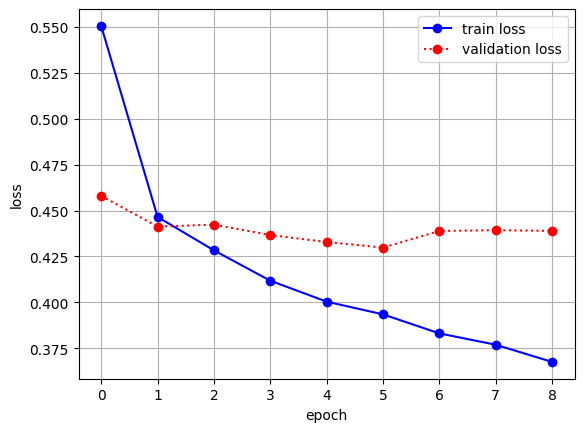

In [ ]:
plot_train_val_loss(result4)

In [ ]:
model_lstm2.evaluate(x= x_train, y= y_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - binary_accuracy: 0.8254 - loss: 0.3799


[0.3718157112598419, 0.8271499872207642]

In [ ]:
model_lstm2.evaluate(x= x_val, y= y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - binary_accuracy: 0.7985 - loss: 0.4286


[0.42983052134513855, 0.8008000254631042]

## 2개의 LSTM 층 연결

*   Embedding --> LSTM(1) --> LSTM(2) --> 출력층
*   Embedding 층의 output_dim은 32로 설정.
*   LSTM(1)의 셀의 개수는 32개. dropout은 0.2로 설정.
    *   return_sequence 파라미터 값을 설정.
*   LSTM(2)의 셀의 개와 Dropout 비율은 첫번째와 동일하게.
    *   return_sequence 파라미터 값은 기본 값(default argument)을 사용.

In [ ]:
model_lstm3 = keras.Sequential(layers = [
    keras.Input(shape = (100,)),
    keras.layers.Embedding(input_dim = 500, output_dim =32),
    keras.layers.LSTM(units = 32, dropout= 0.2, return_sequences = True),
    keras.layers.LSTM(units = 32, dropout= 0.2, return_sequences = False),
    keras.layers.Dense(units = 1, activation= 'sigmoid')
])

In [ ]:
model_lstm3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 100, 32)        │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 32)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,021 (382.90 KB)

 Trainable params: 32,673 (127.63 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,348 (255.27 KB)

2개 이상의 LSTM 층을 연결할 때,
*   원래 순환층(RNN, LSTM)의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 그 다음 층으로 전달.
*   순환층을 2개 이상 쌓게 되면 모든 순환층에서 순차 데이터(시퀀스)가 필요.
*   따라서 앞쪽 순환층이 모든 타입 스텝에 대한 은닉 상태를 출력해야함. 시퀀스를 다음 순환층으로 입력해줘야 함.
*   오직 마지막 순환층에서만 마지막 타입스텝의 은닉 상태를 출력해야 함.
*   중간에 포함된 순환층에서는 return_sequences= True로 설정해야함.
*   마지막 순환층에서만 return_sequences= False (기본값)으로 설정해야 함.

In [ ]:
model_lstm3.compile(optimizer= keras.optimizers.Adam(),
                              loss= keras.losses.binary_crossentropy,
                              metrics = [keras.metrics.binary_accuracy])

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='model_lstm3.keras',
                                             save_best_only= True)
early_stop = keras.callbacks.EarlyStopping(patience = 3,
                                           restore_best_weights= True)

In [ ]:
result5 = model_lstm3.fit(x= x_train, y= y_train, batch_size= 32, epochs= 100,
                          callbacks= [checkpoint, early_stop],
                          validation_data= [x_val, y_val])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - binary_accuracy: 0.7868 - loss: 0.4605 - val_binary_accuracy: 0.7846 - val_loss: 0.4803
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - binary_accuracy: 0.8029 - loss: 0.4322 - val_binary_accuracy: 0.7912 - val_loss: 0.4650
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - binary_accuracy: 0.7862 - loss: 0.4456 - val_binary_accuracy: 0.7708 - val_loss: 0.4811
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - binary_accuracy: 0.8081 - loss: 0.4186 - val_binary_accuracy: 0.7934 - val_loss: 0.4475
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.8166 - loss: 0.3989 - val_binary_accuracy: 0.8006 - val_loss: 0.4393
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - binary_accuracy: 0.8190 - loss: 0.3927 - val_binary_accuracy: 0.7980 - val_loss: 0.4504
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - binary_accuracy: 0.8226 - loss: 0.3868 - val_binary_accuracy: 0.7946 - val_lo

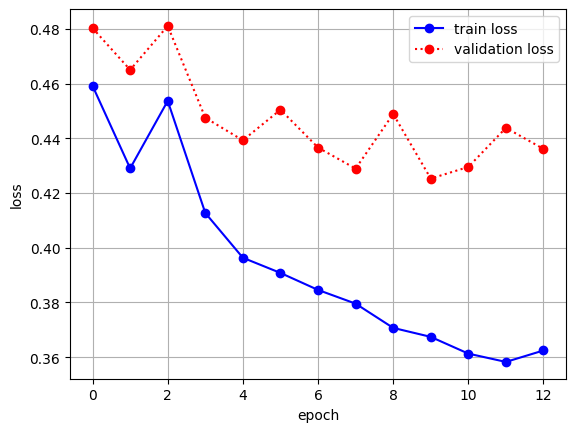

In [ ]:
plot_train_val_loss(result5)

In [ ]:
model_lstm3.evaluate(x= x_train, y= y_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - binary_accuracy: 0.8381 - loss: 0.3630


[0.3555760979652405, 0.8393999934196472]

In [ ]:
model_lstm3.evaluate(x= x_val, y= y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - binary_accuracy: 0.7974 - loss: 0.4271


[0.4252814054489136, 0.8033999800682068]

# GRU(Gated Recurrent Unit)

*   3개의 작은 셀들로 이루어진 순환 셀. 2개는 sigmoid, 1개는 tanh를 활성화 함수로 사용.
*   LSTM보다 훈련을 통해서 찾는 모델 파라미터 개수가 작아짐. 계산량이 작아짐.
*   일반적으로 LSTM보다 더 좋은 성능을 냄.

In [ ]:
model_gru = keras.Sequential(layers = [
    keras.Input(shape = (100,)),
    keras.layers.Embedding(input_dim= 500, output_dim= 32),
    keras.layers.GRU(units= 32, dropout= 0.2),
    keras.layers.Dense(units= 1, activation='sigmoid')
])

In [ ]:
model_gru.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 100, 32)        │        16,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,369 (87.38 KB)

 Trainable params: 22,369 (87.38 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# GRU 층에서 학습되는 모델 파라미터 개수
# (embedding inputs * 순환 은닉 입력 + 바이어스) * 게이트(3) * GRU 셀 개수(32) + keras 구현
(32 + 32 + 1) * 3 * 32 + (2 + 1) * 32

6336

In [ ]:
model_gru.compile(optimizer= keras.optimizers.Adam(),
                  loss= keras.losses.binary_crossentropy,
                  metrics = [keras.metrics.binary_accuracy])

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(filepath='model_gru.keras',
                                             save_best_only= True)
early_stop = keras.callbacks.EarlyStopping(patience= 3,
                                           restore_best_weights= True)

In [ ]:
result6= model_gru.fit(x= x_train, y= y_train, batch_size = 32, epochs= 100,
                       callbacks= [checkpoint, early_stop],
                       validation_data = [x_val, y_val])

Epoch 1/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - binary_accuracy: 0.6284 - loss: 0.6224 - val_binary_accuracy: 0.7646 - val_loss: 0.4829
Epoch 2/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - binary_accuracy: 0.7788 - loss: 0.4694 - val_binary_accuracy: 0.7856 - val_loss: 0.4533
Epoch 3/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - binary_accuracy: 0.7994 - loss: 0.4337 - val_binary_accuracy: 0.7866 - val_loss: 0.4510
Epoch 4/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - binary_accuracy: 0.8130 - loss: 0.4139 - val_binary_accuracy: 0.7896 - val_loss: 0.4460
Epoch 5/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - binary_accuracy: 0.8184 - loss: 0.4012 - val_binary_accuracy: 0.7982 - val_loss: 0.4306
Epoch 6/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - binary_accuracy: 0.8196 - loss: 0.3907 - val_binary_accuracy: 0.8002 - val_loss: 0.4295
Epoch 7/100
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - binary_accuracy: 0.8287 - loss: 0.3807 - val_binary_accuracy: 0.8034 - val_loss: 0.4

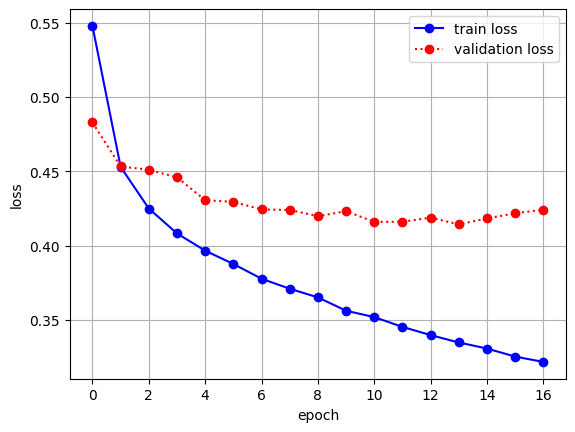

In [ ]:
plot_train_val_loss(result6)

In [ ]:
model_gru.evaluate(x= x_train, y= y_train)

625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - binary_accuracy: 0.8669 - loss: 0.3076


[0.30505239963531494, 0.8673499822616577]

In [ ]:
model_gru.evaluate(x = x_val, y= y_val)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - binary_accuracy: 0.8131 - loss: 0.4140


[0.41429609060287476, 0.8144000172615051]